> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday*, February 28, 2018, 23:59<br>
**Peergrading deadline**: *Sunday*, March 4, 2018, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, March 7, 2018, 23:59

[**Questions**](https://github.com/ulfaslak/computational_analysis_of_big_data_2018_spring/issues) **/** [**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex. 1.2.2**: Working with JSON files
>1. Use [`requests`](https://www.google.dk/search?q=python+requests+get+json&gws_rd=cr&ei=M5OdWaewD8Ti6AS54J24Bg), or another Python module, to store **[this data](https://www.reddit.com/r/gameofthrones/.json)** in a new variable `data`. Store it as a `dict` type object (you can print its type by running `type(data)`).

In [1]:
import requests as rq # import requests to make requests to the web
# Make request and convert it to json
data = rq.get("https://www.reddit.com/r/gameofthrones/.json",  headers = {'User-agent': 'JackMazanec'}).json()
# Print type to validate that its a dict
print type(data)

<type 'dict'>


>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [2]:
## List comprehension that counts the number of spoilers
spoilers = 0
listtrue= [data['data']['children'][i]['data']['spoiler'] for i in range(len(data['data']['children'])) if data['data']['children'][i]['data']['spoiler'] == True]
print "Number of spoilers: " + str(len(listtrue))
## Only print headlines that aren't spoilers
headlines= [data['data']['children'][i]['data']['title'] for i in range(len(data['data']['children'])) if data['data']['children'][i]['data']['spoiler'] == False]
print "Headlines:"
# loop through and print headlines
for headline in headlines:
    print headline

Number of spoilers: 16
Headlines:
[NO SPOILERS] 'The Drowned God'. A piece I did after a massive GoT marathon.
[NO SPOILERS] Stuck on a train in Scotland, just awaiting the invasion of the White Walkers
[EVERYTHING] AltShiftX - What's the three eyed raven's secret plan?
[NO SPOILERS] “Weirwood Leaf”, Acrylic on a Sycamore Leaf 6”X 7”
[NO SPOILERS] George RR Martin's blog post about casting of GoT in 2009 and fans reaction to it
[NO SPOILERS] My favorite GoT wallpaper (by Adam Spizak)
[EVERYTHING] Arya and Gendry prediction
[NO SPOILERS] I put together a guitar and drum video I did of the theme song.
[EVERYTHING] A Duality of Ice and Fire: Why Azor Ahai is two heads of the Three Headed Dragon
[Everything]GOT Season 7 In 3 Minutes


### Week 2

>**Ex 2.1.5**: Take another list `b = list("ofcourseistillloveyou")` and
1. get the `set` of characters that exist in both `a` and `b` (intersection),
2. get the `set` of characters that exist in either `a` or `b` (union), and
3. compute the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) between the distinct elements in `a` and `b`.

>*Hint: use the `set` function to get a `set`-type object of distinct elements from a list*

In [3]:
## Initialize lists
a = list("justreadtheinstructions")
b = list("ofcourseistillloveyou") 
## Convert lists into sets
a_s = set(a)
b_s = set(b)
## Get the intersect
intersect = a_s.intersection(b_s)
## Get the union
union = a_s.union(b_s)
## Output values
print "Intersection: " + str(intersect)
print "Union:        " + str(union)
print "Jaccard sim:  " + str((float(len(intersect))/float(len(union))))

Intersection: set(['c', 'e', 'i', 'o', 's', 'r', 'u', 't'])
Union:        set(['a', 'c', 'e', 'd', 'f', 'i', 'h', 'j', 'l', 'o', 'n', 's', 'r', 'u', 't', 'v', 'y'])
Jaccard sim:  0.470588235294


>**Ex. 2.2.4**: Looking at the scatter plots there appears to be some unevenness in the number of comments and upvotes that different posts receive.
1. Plot the distributions of `x` for "gameofthrones" and "news" as histograms, side by side. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png).
2. What do these distributions say about how people comment on Reddit?

In [4]:
## HIS FUNCTION TO GET DATA -- NOT PART OF ASSIGNMENT
def get_x_y(subreddit, N, count=25): 
    # Function inside another function
    # takes a subreddit, the number of posts to retrieve and the id of the last post fethced
    # return the data in json form for the posts specifying those parameters
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after) # url to make request to
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json() # make request to reddit
        print "Retrieved %d posts from page %s" % (count, after)
        return data
    after = "" # start at the very beginning of the subreddit
    x, y = [], [] # intialize lists for number of comments and scores
    # make calls to _get_data function in chunks until there are a total of N posts
    for n in range(N/count):
        # Get the data
        data = _get_data(subreddit, count, after)
        # Put all the data from the json into x and y respectively
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        # update after for the next request
        after = data['data']['after']
    # return x and y
    return x, y
## GET DATA
print "Getting Game of thrones data"
x,y = get_x_y("gameofthrones", 500, count=25)
print "Getting news data"
x_news, y_news = get_x_y("news", 500, count=25)
print "Done"

Getting Game of thrones data
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_80ppgv
Retrieved 25 posts from page t3_8073rl
Retrieved 25 posts from page t3_7zxeho
Retrieved 25 posts from page t3_7zuokv
Retrieved 25 posts from page t3_7zc7lq
Retrieved 25 posts from page t3_7yxk4s
Retrieved 25 posts from page t3_7ywpdc
Retrieved 25 posts from page t3_7yh1y3
Retrieved 25 posts from page t3_7y1xzz
Retrieved 25 posts from page t3_7xktwv
Retrieved 25 posts from page t3_7xm6j9
Retrieved 25 posts from page t3_7xcmni
Retrieved 25 posts from page t3_7wxoon
Retrieved 25 posts from page t3_7wmrm5
Retrieved 25 posts from page t3_7w26rm
Retrieved 25 posts from page t3_7w0o5c
Retrieved 25 posts from page t3_7vqy2g
Retrieved 25 posts from page t3_7v6cnn
Retrieved 25 posts from page t3_7vcx4n
Getting news data
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_80uizt
Retrieved 25 posts from page t3_80rdbc
Retrieved 25 posts from page t3_80puxh
Retrieved 25 posts from page t3_80r

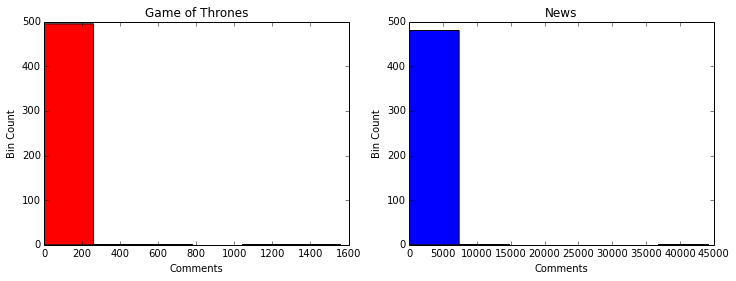

In [5]:
# make sure plots are in jupyter
%matplotlib inline 
from matplotlib import pyplot as plt # import pyplot
plt.figure(figsize=(12,4)) # set figure size
plt.subplot(1,2,1) # create subplot for GOT
plt.hist(x, bins=6, color="red") # create histogram
# Set axis labels and title
plt.xlabel("Comments")
plt.ylabel("Bin Count")
plt.title("Game of Thrones")
# create subplot for news
plt.subplot(1,2,2)
plt.hist(x_news, bins=6, color="blue")
plt.xlabel("Comments")
plt.ylabel("Bin Count")
plt.title("News")
# Display plots
plt.show()

What do these distributions say about how people comment on Reddit?
These histograms tell us that overall, an overwhelming amount of posts have between 0 and 1000 comments. However, there are various small peaks of comments much larger than 1000, so it is clear that a small number of posts stand out as very popular and are receiving about 8 times (News) and 3 times(Game of Thrones) the amount of posts as those in these major bins.

>**Ex. 2.3.5**: Create a $5 \times 5$ array `X` (a matrix) with random numbers and $5 \times 1$ array `a` (a tall vector) with 5 random numbers.
1. Compute the matrix-vector dot product between these two. Use `numpy`'s `dot` method. 
2. What happens if you just use `*` instead of `np.dot`? Explain.

In [6]:
import numpy as np
## Create arrays
rand_matrix = np.random.randn(5,5)
rand_vector = np.random.randn(5,1)
# Dot product
rand_dot    = np.dot(rand_matrix, rand_vector)
# Simple Multiplication
rand_mult   = rand_matrix * rand_vector
# Print results
print "Numpy Dot:"
print rand_dot
print "\nSimple Multiplication:"
print rand_mult

Numpy Dot:
[[ 4.29600149]
 [ 2.25453959]
 [-5.46214188]
 [ 1.79618718]
 [-1.15947634]]

Simple Multiplication:
[[ 0.51443479  1.13381829 -0.84061199  1.63751939  0.97852302]
 [ 1.71695372  1.84437508  1.62952772 -2.32902938 -0.47915461]
 [-1.28452368 -1.03727877 -0.05156635 -0.7421082   0.63991487]
 [-0.11376668  1.01622006 -1.39889877  0.01033536  0.13705147]
 [-0.02796066  0.03272539 -0.65136666  0.17982263 -0.23750622]]


Using just the * multiplies each column in the matrix by its element wise complement in the vector. np.dot multiplies the rows in the matrix by the columns in the vector and sums them up creating a 5 x 1 vector.

>**Ex. 2.4.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [7]:
# Initialize variable
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]
# Compute mean
mean = np.mean(a)
print "Mean: " + str(mean)
# Compute median
median = np.median(a)
print "Median: " + str(median)

Mean: 1002.3333333333334
Median: 3.0


2.) The median is defined as the number that is located at the 50th quantile of the data, meaning that 50% of the data values are below the median.

3.) Taking the median of list a is more suitable than taking the mean in this case because there is an outlier in the list. The number 9000 causes the mean to be inflated and the median to give a more accurate representation of the spread of the list.

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [8]:
conth = "0" # used to continue making requests and keep track of where you left off
contv = "0" # used to continue making requests and keep track of where you left off
# Instantiate lists
heroes = list()
villains = list()
# Loop through each hero and get the data for the heroes
while True:
    # Set up URL
    urlh = "https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes&cmlimit=500&prop=revisions&rvprop=content&cmcontinue="+ conth
    datah = rq.get(urlh).json() # Make request
    heroes.extend(datah['query']['categorymembers']) # add results to list
    try:
        conth = datah['continue']['cmcontinue'] # get the point where it left off
    except:
        break # break if its gotten everything
# Do the same for villains        
while True:
    urlv = "https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains&cmlimit=500&prop=revisions&rvprop=content&cmcontinue="+ contv
    datav = rq.get(urlv).json()
    villains.extend(datav['query']['categorymembers'])
    try:
        contv = datav['continue']['cmcontinue']
    except:
        break
# Get the heroes and villains and ambiguous's names from the data
heroes = [x['title'] for x in heroes]
villains = [x['title'] for x in villains]
ambiguous = set(heroes).intersection(set(villains)) # members in both heroes and villains
# Print results
print "Heroes: " + str(len(heroes))
print "Villains: " +str(len(villains))
print "Both heroes and villains: " + str(len(ambiguous))
# Print and compute jaccard similarity
print "Jacquard Similarity: " + str(float(len(set(heroes).intersection(set(villains))))/float(len(set(heroes).union(set(villains)))))

Heroes: 978
Villains: 1302
Both heroes and villains: 173
Jacquard Similarity: 0.0821072615093


>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `normed=True`. Other distribution plots are fine too, though.*

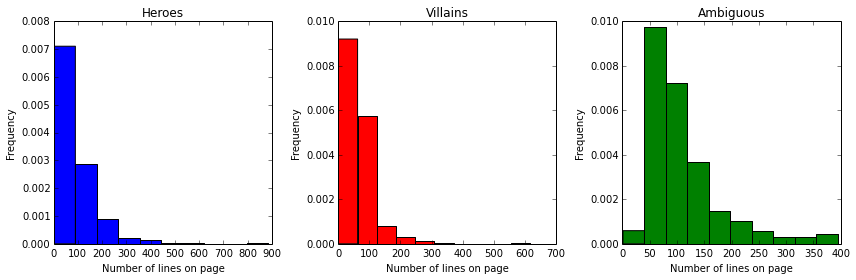

In [87]:
import os # in order to loop through directories
# Init dictionaries key: title value: length of page
hero_length = dict()
vill_length = dict()
ambi_length = dict()
# loop through the directories
# get the lines for each file
# heroes
for file_name in os.listdir("../data/heroes"):
    with open("../data/heroes/" + file_name) as f:
        lines = 0
        for line in f: lines += 1
    hero_length[file_name] = lines
# villains
for file_name in os.listdir("../data/villains"):
    with open("../data/villains/" + file_name) as f:
        lines = 0
        for line in f: lines += 1
    vill_length[file_name] = lines
# ambiguous
for file_name in os.listdir("../data/ambiguous"):
    with open("../data/ambiguous/" + file_name) as f:
        lines = 0
        for line in f: lines += 1
    ambi_length[file_name] = lines
    
# Convert dicts to lists
hero_vals = hero_length.values()
vill_vals = vill_length.values()
ambi_vals = ambi_length.values()
# plots
plt.figure(figsize=(12,4)) # set figure size
# create subplot for Heroes
plt.subplot(1,3,1) 
plt.hist(hero_vals, normed=True) # create hist
# Set axis labels and title
plt.xlabel("Number of lines on page")
plt.ylabel("Frequency")
plt.title("Heroes")
# create subplot for villains
plt.subplot(1,3,2) 
plt.hist(vill_vals, normed=True, color="red") # create hist
# Set axis labels and title
plt.xlabel("Number of lines on page")
plt.ylabel("Frequency")
plt.title("Villains")
# create subplot for ambiguous
plt.subplot(1,3,3) 
plt.hist(ambi_vals, normed=True, color="green") # create hist
# Set axis labels and title
plt.xlabel("Number of lines on page")
plt.ylabel("Frequency")
plt.title("Ambiguous")
plt.tight_layout()

It seems like the graphs are skewed right. It seems like the majority of characters have smaller wikipedia pages. There are a couple heroes that stand out as the most popular with over 1000 more lines than the most in Ambiguous or Villains. We thought this made sense because people admire clearcut heroes more than villains or ambiguous characters.

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

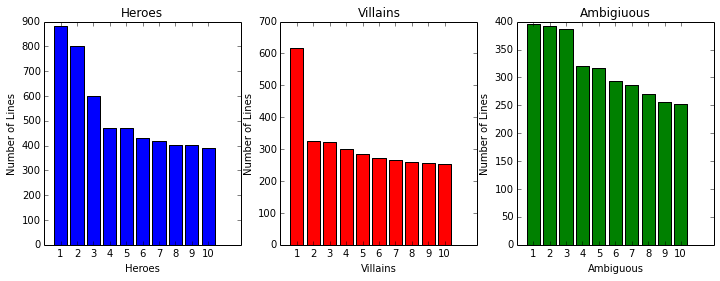

Hero legend
1: Jean Grey.txt
2: Wolverine (character).txt
3: Black Panther (comics).txt
4: Moon Knight.txt
5: Spider-Man.txt
6: Cable (comics).txt
7: She-Hulk.txt
8: X-23.txt
9: Deadpool.txt
10: Cyclops (Marvel Comics).txt

Villain legend
1: Dormammu.txt
2: Doctor Octopus.txt
3: Hood (comics).txt
4: Loki (comics).txt
5: Red Skull.txt
6: Mandarin (comics).txt
7: Norman Osborn.txt
8: Vulture (Marvel Comics).txt
9: Carnage (comics).txt
10: Galactus.txt

Ambiguous legend
1: Namor.txt
2: Eddie Brock.txt
3: Rogue (comics).txt
4: Emma Frost.txt
5: Sabretooth (comics).txt
6: Phoenix Force (comics).txt
7: Mystique (comics).txt
8: Magneto (comics).txt
9: Crimson Dynamo.txt
10: Legion (Marvel Comics).txt


In [10]:
# Get titles of top line characters
h = sorted(hero_length, key=hero_length.get, reverse=True)[0:10]
v = sorted(vill_length, key=vill_length.get, reverse=True)[0:10]
a = sorted(ambi_length, key=ambi_length.get, reverse=True)[0:10]
# Get lists of heights
h_heights = [hero_length[x] for x in h]
v_heights = [vill_length[x] for x in v]
a_heights = [ambi_length[x] for x in a]
# Make bars
plt.figure(figsize=(12,4)) # set figure size
# Heroes
plt.subplot(1,3,1) 
plt.xlabel("Heroes")
plt.ylabel("Number of Lines")
plt.title("Heroes")
plt.bar(range(1, len(h) + 1), h_heights,width=0.8, align="center")
plt.xticks(range(1, len(h) + 1))
# Villains
plt.subplot(1,3,2) 
plt.xlabel("Villains")
plt.ylabel("Number of Lines")
plt.title("Villains")
plt.bar(range(1, len(v) + 1), v_heights,width=0.8, align="center", color="red")
plt.xticks(range(1, len(v) + 1))
# Villains
plt.subplot(1,3,3) 
plt.xlabel("Ambiguous")
plt.ylabel("Number of Lines")
plt.title("Ambigiuous")
plt.bar(range(1, len(a) + 1), a_heights,width=0.8, align="center", color="green")
plt.xticks(range(1, len(a) + 1))
plt.show()
# Legends because they couldnt fit on the graphs
print "Hero legend"
for i,hero in enumerate(h): print str(i+1) + ": " + hero
print "\nVillain legend"
for i,vill in enumerate(v): print str(i+1) + ": " + vill
print "\nAmbiguous legend"
for i,ambi in enumerate(a): print str(i+1) + ": " + ambi

Some unexpected heroes, villains, and ambiguous characters page lengths are the longest. We had never heard of Jean Grey before this class.

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*

In [11]:
import re
import os
#grabs all instanes of the word'debut' from each heroes' page if the page has a debut year
debutss=[]
for file_name in os.listdir("../data/heroes"):
    with open("../data/heroes/" + file_name) as f:
        ff=f.read()
        debuts=re.findall(r'debut.+?\n',ff) #catches the word debut and the remaining text up until a new line
        debutss.append(debuts)

#Makes a list with only the first instances of debut from each heroes' page 
first_instances=[]
for i in debutss: #iterates through the list of 'debut' instances compiled from the code above
    for x,y in enumerate(i): #accesses each element of the larger list 'debutss' as a list and appends the first element
        if y != []:
            if x == 0:
                first_instances.append(y)

#takes the list of the first instance of debut for each characer and grabs only the year within that text
debs_heroes=[]
match2=re.findall(r"\d{4}\)",str(first_instances)) #performs a regular expression (4 numerical characters) on 1st debuts
debs_heroes.append(match2)
debut_yearsh=debs_heroes

#Cleans the list created above because the regular expression captures a ')' at the end of the year
final_heroes=[]
for year in debs_heroes:
    for i in year:
        final_heroes.append(int(i[:-1])) #grabs the year and converts it from a string to an integer
print final_heroes



[2002, 2003, 1941, 2005, 1998, 1976, 1977, 1977, 1962, 2014, 2005, 1971, 1996, 1974, 1998, 1981, 1947, 1971, 1990, 2004, 1979, 1961, 2005, 1992, 1993, 2002, 1991, 1970, 1987, 1977, 2006, 1998, 1998, 2014, 2003, 1993, 1978, 1992, 1993, 1971, 2011, 1998, 1991, 1988, 2008, 2001, 1975, 1975, 2011, 1984, 1985, 1963, 1954, 1965, 1984, 1997, 1941, 1979, 1977, 1975, 1941, 1976, 1967, 1986, 1982, 2009, 1991, 1987, 1975, 2002, 1941, 1977, 1977, 1978, 1941, 1995, 1969, 1978, 1987, 1987, 1941, 1994, 1967, 1980, 1966, 1962, 2011, 2017, 1969, 1964, 1940, 2003, 1968, 1968, 1965, 1941, 2005, 2008, 2014, 1994, 1987, 1990, 1993, 1977, 2005, 2001, 1972, 2001, 1939, 1975, 1984, 1976, 2014, 1989, 1983, 1977, 2003, 1982, 2008, 1969, 1995, 1977, 1980, 1998, 1979, 1989, 2016, 1975, 2003, 1984, 1993, 1964, 2016, 1962, 2012, 1963, 1963, 1940, 1943, 1950, 1978, 1987, 1972, 2009, 2004, 1975, 1967, 1972, 1980, 1962, 1962, 1963, 1966, 1968, 2009, 2015, 1963, 2009, 1982, 1971, 1962, 1986, 1990, 1994, 2001, 1941, 197

In [12]:
#Does the same for villains
debutssv=[]
for file_name in os.listdir("../data/villains"):
    with open("../data/villains/" + file_name) as f:
        ff=f.read()
        debuts=re.findall(r'debut.+?\n',ff) #catches the word debut and the remaining text up until a new line
        debutssv.append(debuts)

#Makes a list with only the first instances of debut from each heroes' page 
first_instancesv=[]
for i in debutssv: #iterates through the list of 'debut' instances compiled from the code above
    for x,y in enumerate(i): #accesses each element of the larger list 'debutss' as a list and appends the first element
        if y != []:
            if x == 0:
                first_instancesv.append(y)

#takes the list of the first instance of debut for each characer and grabs only the year within that text
debs_villains=[]
match2=re.findall(r"\d{4}\)",str(first_instancesv)) #performs a regular expression (4 numerical characters) on 1st debuts
debs_villains.append(match2)

#Cleans the list created above because the regular expression captures a ')' at the end of the year
final_villains=[]
for year in debs_villains:
    for i in year:
        final_villains.append(int(i[:-1])) #grabs the year and converts it from a string to an integer
print final_villains

[1965, 1964, 1970, 1995, 1975, 2000, 1980, 2003, 1964, 1979, 1970, 1979, 1964, 1991, 1967, 1965, 1966, 1975, 1981, 1981, 1983, 1987, 1992, 1985, 1983, 1982, 1976, 1966, 1966, 2000, 1988, 1995, 1962, 2016, 1969, 1977, 1977, 1985, 1966, 1991, 1984, 1983, 1967, 1986, 1972, 2001, 2003, 2003, 1968, 1999, 1973, 1975, 1995, 1969, 1969, 1979, 1963, 1983, 1978, 1977, 1995, 1965, 1995, 1968, 1979, 2006, 1979, 1963, 1977, 1987, 1988, 1965, 1972, 1973, 1993, 1975, 1972, 1991, 1984, 1963, 2002, 1965, 1974, 2008, 1966, 1968, 1973, 1981, 1993, 1986, 2004, 1965, 1965, 1981, 1963, 1986, 1962, 1995, 1973, 1989, 1963, 1964, 1965, 1975, 1978, 1988, 1966, 2002, 1990, 1986, 1989, 2004, 1963, 2012, 1984, 1985, 1986, 1993, 1976, 1993, 1983, 1988, 1990, 2002, 1976, 1981, 1986, 1988, 1993, 1984, 1990, 1969, 1969, 1993, 1973, 1980, 1967, 1968, 1978, 1986, 1973, 1981, 1985, 1999, 1981, 1966, 1993, 1966, 1975, 1999, 1986, 1974, 1992, 1974, 1992, 1984, 1991, 1966, 1979, 1989, 1981, 1965, 1976, 1979, 1986, 1987, 197

In [13]:
debutssa=[]
for file_name in os.listdir("../data/ambiguous"):
    with open("../data/ambiguous/" + file_name) as f:
        ff=f.read()
        debuts=re.findall(r'debut.+?\n',ff) #catches the word debut and the remaining text up until a new line
        debutssa.append(debuts)

#Makes a list with only the first instances of debut from each ambiguous character's page 
first_instancesa=[]
for i in debutssa: #iterates through the list of 'debut' instances compiled from the code above
    for x,y in enumerate(i): #accesses each element of the larger list 'debutss' as a list and appends the first element
        if y != []:
            if x == 0:
                first_instancesa.append(y)

#takes the list of the first instance of debut for each characer and grabs only the year within that text
debs_amb=[]
match2=re.findall(r"\d{4}\)",str(first_instancesa)) #performs a regular expression (4 numerical characters) on 1st debuts
debs_amb.append(match2)

#Cleans the list created above because the regular expression captures a ')' at the end of the year
final_ambiguous=[]
for year in debs_amb:
    for i in year:
        final_ambiguous.append(int(i[:-1])) #grabs the year and converts it from a string to an integer
print final_ambiguous

[1972, 1953, 1983, 1961, 1986, 1991, 1974, 1982, 1974, 2002, 1985, 1986, 1976, 2000, 2009, 2010, 1988, 1964, 1965, 1980, 1984, 1997, 2008, 2010, 1969, 1971, 1991, 1993, 1984, 1972, 1964, 2001, 2006, 2008, 2010, 2014, 1985, 2008, 1986, 1988, 1988, 2008, 2012, 1994, 1973, 1995, 1962, 1974, 1975, 1994, 1994, 1996, 2016, 1976, 1983, 1993, 1976, 1984, 1988, 1976, 2001, 2007, 2009, 1993, 1988, 1984, 1939, 1965, 1985, 1965, 1964, 1986, 1967, 1997, 2000, 2005, 1995, 1980, 1963, 1962, 2008, 1982, 1954, 1992, 1940, 1968, 1989, 1977, 1982, 1986, 1963, 1977, 1981, 1973, 1977, 1961, 1972, 1981, 1986, 1967, 1968, 1965, 1974, 2009, 1978, 1978, 1983, 1986, 1977, 1966, 1992, 1985, 1999, 2010, 1980, 1984, 1975, 1979, 1991, 1965, 2006, 1991, 1984, 1991, 1985, 1974, 1981, 1981, 1973, 2001, 1974, 2003, 1977, 1984, 1996, 1999, 2005, 1981, 1995, 1988, 1980, 2006, 2007, 2016, 2018, 1974, 1995, 1995, 2011, 2013, 2014, 1968, 1961, 2003, 1994, 2012, 2001, 1966, 1969, 1981, 1964, 1997, 2000, 2001, 2004, 2010, 201

### Week 4

*If you had trouble boulding a team alliance matrix, use mine. You can load it as a pandas.DataFrame, with pd.read_csv('data_team_alliances.csv', index_col=0). The rightmost column is the target array.*

Just used to setup 4.2.1

In [14]:
import re, os

def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("../data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\n", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]

In [15]:
teams = set()
for faction in ["heroes", "ambiguous", "villains"]:

    faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction) if c != ".DS_Store"]
    
    for char in faction_chars:
        teams.update(get_alliances(char))

In [16]:
import numpy as np
index_dict = dict(zip(list(teams), range(len(teams))))

def get_alliance_vect(char):
    char_teams = get_alliances(char)

    alliance_vector = [0] * len(teams)
    for ct in char_teams:
        team_index = index_dict[ct]
        alliance_vector[team_index] = 1
        
    return np.array(alliance_vector)

In [17]:
X, y = [], []
for faction in ["heroes", "villains"]:
    for char in [c[:-4] for c in os.listdir("../data/%s" % faction) if c != ".DS_Store"]:
        if sum(get_alliance_vect(char)) == 0:
            continue
        X.append(get_alliance_vect(char))
        
        if faction == "heroes":
            y.append(1)
        if faction == "villains":
            y.append(0)
    
        
X = np.array(X)
y = np.array(y)

> **Ex. 4.2.1**: Train a classifier on all of your data and test its accuracy.

>* If your team alliance matrix is `X_ta` and your target array is `y_ta` you can do this by instantiating a model like:
>
        from sklearn.naive_bayes import BernoulliNB
        model = BernoulliNB()
        model.fit(X_ta, y_ta)  # <--- This is the training/fitting/learning step
        
> The `BernoulliNB` is a version of the Naive Bayes classifier which associates certain features with labels and asks what the probability of a label for a data point is given its features. You are free to use any other classifier if you want. Popular ones are trees, random forests, support vector machines, feed forward neural networks, logistic regression, and the list goes on. With `sklearn`, they are just as easy to employ as the `BernoulliNB` classifier.


>1. Test the accuracy of your model. You can use the `.predict` method on the `model` object to get predictions for a matrix of data points. Report the accuracy of your model on the same data that you trained the model on, alongside the baseline accuracy of a "dumb" model that only guesses for the majority class.

>2. Report the precision, recall and F1 scores, with respect to the minority class (heroes). `sklearn` has implementations that you can use if you are short for time. Extra credit for doing it using only basic linear algebra operations with `numpy`, though.

In [86]:
from sklearn.naive_bayes import BernoulliNB
# Setup a model
model = BernoulliNB()
model.fit(X, y) # fit the model with your data
y_pred = model.predict(X) # make predictions on the training data
accuracy = np.mean(y == y_pred) # calculate the accuracy
print "Prediction accuracy: " + str(accuracy)
# Baseline
y_base_accuracy = float(sum((1-y)))/(len(y))
print "Baseline accuracy: " + str(y_base_accuracy)
# Precision: (true positives)/(false positives + true positives)
tp = sum(y_pred & y)
fp = sum(y_pred & (1-y))
fn = sum((1-y_pred) & y)
precision = float(tp)/(tp+fp)
recall = float(tp)/(tp+fn)
f1 = 2*(precision*recall)/(precision+recall)
# Print
print "Precision: " + str(precision)
print "Recall: " + str(recall)
print "F1 score: " + str(f1)

Prediction accuracy: 0.9192339716902581
Baseline accuracy: 0.515403830142
Precision: 0.960151802657
Recall: 0.86941580756
F1 score: 0.912533814247


> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

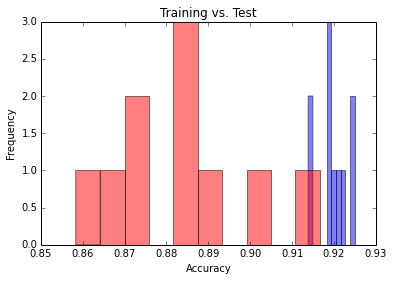

Red is the test data. Blue is the training data.


In [80]:
# Implementation of Cross validation
from sklearn.metrics import f1_score
# Initialize lsit
train_accuracy = list()
test_accuracy = list()
index_cut = int(len(X_t)*0.9) # split data into halfs
# Run for 10 folds
for k in range(10):
    # Shuffle data
    data = zip(X, y)
    np.random.shuffle(data)
    # Put data back together
    X_t = [r[0] for r in data]
    y_t = [r[1] for r in data]
    # Cut data in half
    X_train, y_train = X_t[:index_cut], y_t[:index_cut] # training set
    X_test, y_test = X_t[index_cut+1:], y_t[index_cut+1:] # testing set
    # Set up the model
    model = BernoulliNB()
    # Train the model on trainig data
    model.fit(X_train, y_train) # fit the model with your data
    # Predict result
    y_train_pred = model.predict(X_train) # make predictions on the training data
    y_test_pred = model.predict(X_test) # make predictions on the training data
    # Compute accuracy
    accuracy_train = 	np.mean(y_train == y_train_pred) # calculate the accuracy
    accuracy_test = 	np.mean(y_test == y_test_pred) # calculate the accuracy
    # Add to list
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)

# Print results
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Training vs. Test")
plt.hist(train_accuracy, color='blue', alpha=.5)
plt.hist(test_accuracy, color='red', alpha=.5)
plt.show()
print "Red is the test data. Blue is the training data."

We can see in this histogram that the distribution of our model's accuracy levels on the training data is much narrower than the distribution of the model's accuracy when tested on the test data. This makes sense because we trained the model with the test data. Also, we put 90% of our data into the training group, meaning that the model fits extremely well to this mass of data but struggles a bit in its versatility when applied to the smaller 10% of data in our test group. 

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

Villainess array:
[0.9384511450244472, 0.8585942088140092, 0.038242980158333, 0.6646295386540767, 0.8114607338585108, 0.14119901953709335, 0.9157220412665925, 0.3608905057568404, 0.882954774444097, 0.8585817597728206, 0.052049081030925884, 0.2289525740443513, 0.9908946953025515, 0.9923640037650429, 0.8387402456595531, 0.7730060863249315, 0.9065548512308238, 0.7632233834584269, 0.5849599413219715, 0.012629742975863684, 0.7519242260938401, 0.6301568389986721, 0.18498421320729416, 0.7910794683671388, 0.7632233834584269, 0.9935377921203228, 0.2510736438974067, 0.1832192010321269, 0.9883955218496843, 0.7947775361013036, 0.7197227564822818, 0.8659013185859675, 0.13729281231596902, 0.5170895630287574, 0.08864492986200558, 0.3608905057568404, 0.9405712073258844, 0.17193537909528148, 0.017777754357950107, 0.11076754004593348, 0.04001922395301632, 0.8587785923326747, 0.33406878713901866, 0.5170895630287574, 0.9073574575297622, 0.4806264731490347, 1.394063217673112e-06, 0.04127266960924383, 0.858

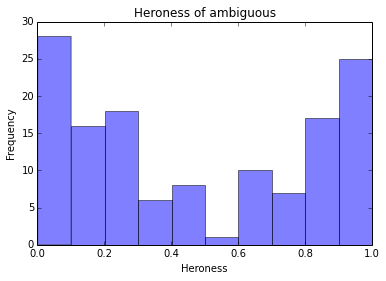

In [85]:
# Set up new model
model = BernoulliNB()
# Train on old data
model.fit(X, y)
# X ambi will contain the alliances matrix for the ambiguous characters
X_ambi = []
# Loop through the ambiguous directory
for char in [c[:-4] for c in os.listdir("../data/ambiguous") if c != ".DS_Store"]:
    # Skip characters without alliances
    if sum(get_alliance_vect(char)) == 0: continue
    # Add the vector to the list
    X_ambi.append(get_alliance_vect(char))       
# Format as a numpy array
X_ambi = np.array(X_ambi)
# Get the villainess and heroeness prob predictions from the model
X_prob = model.predict_proba(X_ambi)
# List of villainess
X_vill = [r[0] for r in X_prob]
print "Villainess array:"
print X_vill
# Create a list of just heroness
X_heroness = [r[1] for r in X_prob]
# Plot the data in a histogram
plt.xlabel("Heroness")
plt.ylabel("Frequency")
plt.title("Heroness of ambiguous")
plt.hist(X_heroness, alpha=.5)
plt.show()


It seems that most ambiguous characters are much closer to heroes or villains than the direct middle. This is evidenced by the inverted bell curve shape of the histogram